In [ ]:
!pip install kaggle

In [ ]:
kaggle = "/content/kaggle.json"

In [ ]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json




In [ ]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9


Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
  0% 0.00/66.7M [00:00<?, ?B/s]
100% 66.7M/66.7M [00:00<00:00, 1.50GB/s]


In [ ]:
from zipfile import ZipFile
import os

file_name = "/content/handwritten-digits-0-9.zip"
extract_folder = "dataset"

with ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


In [ ]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [ ]:
len(data_0)

2236

X shape: (21555, 28, 28, 1)
y shape: (21555,)


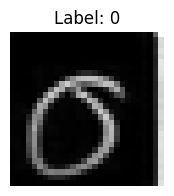

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# PATH DATASET
dataset_path = '/content/dataset'

X, y = [], []

# LOAD DATA
for label in range(10):
    folder_path = os.path.join(dataset_path, str(label))
    if not os.path.exists(folder_path):
        continue

    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)

        img = Image.open(img_path).convert('L')  # grayscale
        img = img.resize((28, 28))               # resize

        img_array = np.array(img)
        img_array = 255 - img_array              # invert warna
        img_array = img_array / 255.0            # normalisasi

        X.append(img_array)
        y.append(label)

# KONVERSI KE NUMPY ARRAY
X = np.array(X)
y = np.array(y)

# TAMBAH CHANNEL (untuk CNN)
X = X[..., np.newaxis]

print("X shape:", X.shape)
print("y shape:", y.shape)

# ===== VISUALISASI =====
idx = 0  # ganti index kalau mau lihat gambar lain

plt.figure(figsize=(2,2))
plt.imshow(X[idx].squeeze(), cmap='gray')
plt.title(f"Label: {y[idx]}")
plt.axis('off')
plt.show()


In [ ]:
print("Jumlah data:", X.shape)
print("Jumlah label:", y.shape)

Jumlah data: (21555, 28, 28, 1)
Jumlah label: (21555,)


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

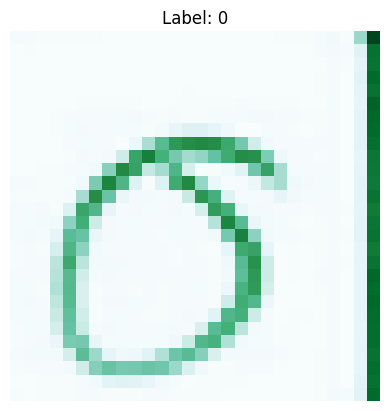

In [ ]:
plt.imshow(X[0], cmap='BuGn')
plt.title(f"Label: {y[0]}")
plt.axis('off')


In [ ]:
# Normalisasi pixel (0–255 =  0–1)
X = X / 255.0

# Reshape: 28x28 = 784
X = X.reshape(X.shape[0], 784)

In [ ]:
# Normalisasi pixel (0–255 =  0–1)
X = X / 255.0

# Reshape: 28x28 = 784
X = X.reshape(X.shape[0], 784)

In [ ]:
print(X.shape)

(21555, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_encoded = to_categorical(y, num_classes=10)

In [ ]:
print(y_encoded.shape)
print(y[:5])
print(y_encoded[:5])

(21555, 10)
[0 0 0 0 0]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1021 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3029
Epoch 2/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1086 - loss: 2.3019 - val_accuracy: 0.1050 - val_loss: 2.3040
Epoch 3/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1041 - loss: 2.3021 - val_accuracy: 0.1050 - val_loss: 2.3033
Epoch 4/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1035 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3037
Epoch 5/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1071 - loss: 2.3024 - val_accuracy: 0.1050 - val_loss: 2.3036
Epoch 6/50
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1056 - loss: 2.3016 - val_accuracy: 0.1050 - val_loss: 2.3034


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0906 - loss: 2.3034
Test Accuracy: 0.09093017876148224
Test Loss: 2.3030149936676025


135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


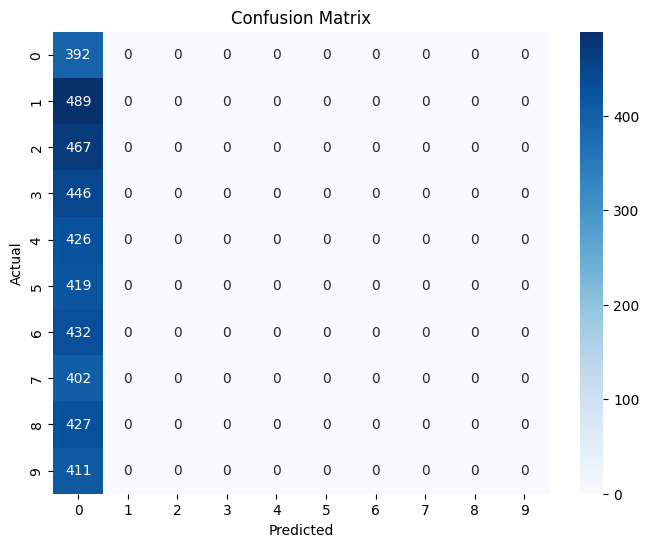

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

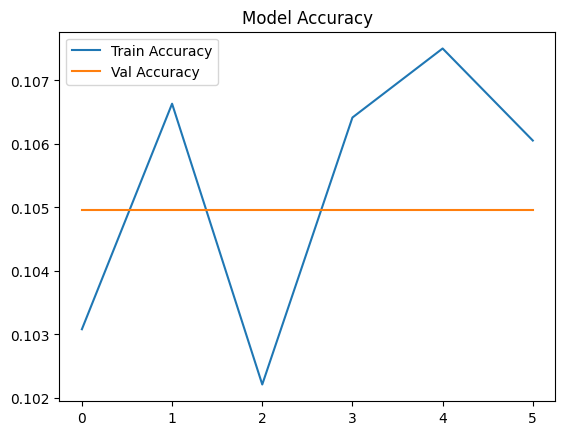

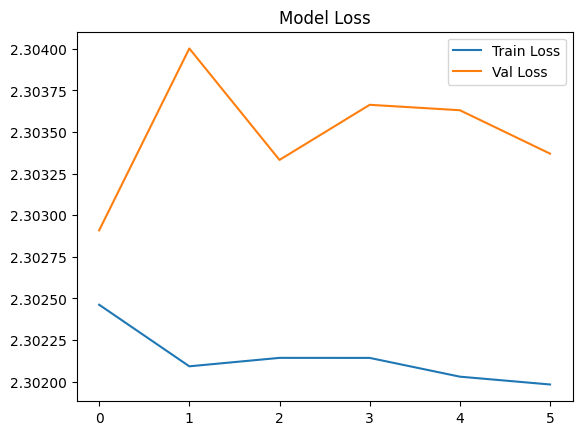

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()